#### **Libraries and modules**

In [1]:
import pandas as pd

%load_ext autoreload
%autoreload 2
import utils

#### **Data collection**

In [2]:
# Data collection
fifa = utils.fetch_with_backoff("https://www.transfermarkt.es/statistik/weltrangliste")
pib = utils.fetch_with_backoff("https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv")

FIFA data saved to 'data_fifa_ranking.csv'
PIB data saved to 'data_pib_mundial.csv'


#### **Data wrangling**

In [3]:
df = utils.data_wrangling()
df.head()

,Year,Position,Country_ESP,Confederation,Points,iso3,Country_ENG,Value,Value_EUR,PBI_EUR_billions_FIFA
0,1992,1,Alemania,UEFA,57,DEU,Germany,2.131572e+12,1.982362e+12,1982.361678
1,1992,2,Italia,UEFA,57,ITA,Italy,1.320162e+12,1.227750e+12,1227.750330
2,1992,3,Brasil,CONMEBOL,56,BRA,Brazil,3.281919e+11,3.052185e+11,305.218476
3,1992,4,Suecia,UEFA,56,SWE,Sweden,2.843211e+11,2.644186e+11,264.418638
4,1992,5,Inglaterra,UEFA,55,GBR,United Kingdom,1.179660e+12,1.097083e+12,1097.083363


### **EDA**

- *Variables description*

In [4]:
# YEAR: Año del ranking/reportado, correspondiente al año de la posición en el ranking de FIFA y al valor económico del país.
# POSITION: Posición del país en el ranking FIFA (1 = mejor, 2 = segundo, etc.). Indica el desempeño relativo en el ranking mundial.
# COUNTRY_ESP: Nombre del país en español.
# CONFEDERATION: Confederación a la que pertenece el país (UEFA, CONMEBOL, CAF, AFC, OFC, CONCACAF). Relaciona el país con su liga/región futbolística.
# POINTS: Puntos obtenidos en el ranking FIFA para ese año. Refleja el desempeño deportivo del país.
# ISO3: Código ISO de 3 letras del país, usado para identificación uniforme.
# COUNTRY_ENG: Nombre del país en inglés.
# VALUE: Valor económico del país en la moneda original, relacionado con el PIB o inversión económica.
# VALUE_EUR: Valor económico convertido a euros (EUR), para comparaciones estandarizadas entre países.
# VALUE_EUR_BILLIONS: Valor económico en euros expresado en miles de millones, para facilitar la interpretación y comparación de magnitudes.

- *Summary statistics*

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import data_wrangling

In [15]:

ultimos_años = [2022, 2023]  # ajusta según tus datos
fifa_ultimos = fifa_pib[fifa_pib['Year'].isin(ultimos_años)]

In [16]:
# Mostrar los top 5 por año
top_fifa_por_año = fifa_ultimos.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)

# Seleccionar solo columnas relevantes: Año, País, Posición, PIB
top_fifa_por_año[['Year', 'Country_ENG', 'Position', 'PBI_EUR_billions_FIFA']]


C:\Users\eduar\AppData\Local\Temp\ipykernel_11156\3960066703.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_fifa_por_año = fifa_ultimos.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)


,Year,Country_ENG,Position,PBI_EUR_billions_FIFA
0,2022,Brazil,1,1815.289266
1,2022,Belgium,2,542.761003
2,2022,Argentina,3,586.954048
3,2022,France,4,2584.555780
4,2022,United Kingdom,5,2872.620980
5,2023,Argentina,1,595.750012
6,2023,France,2,2818.740803
7,2023,United Kingdom,3,3106.230114
8,2023,Belgium,4,587.961417
9,2023,Brazil,5,2021.509060


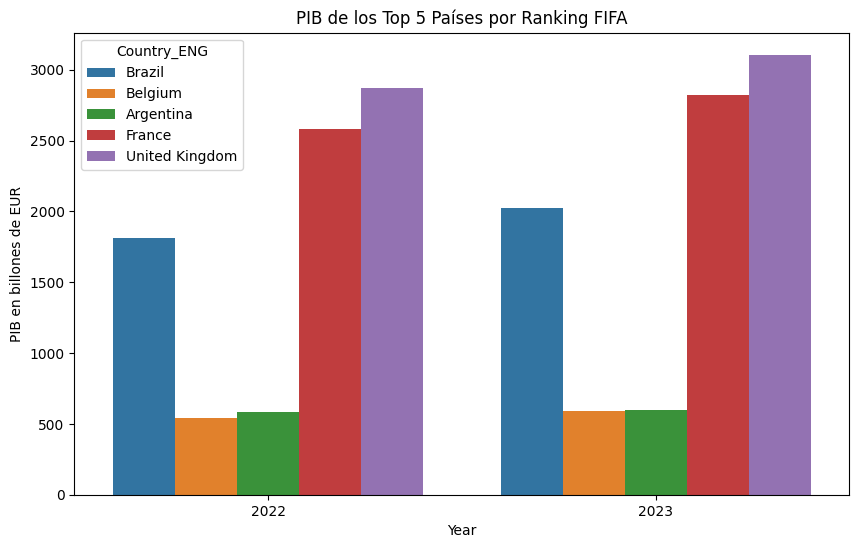

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=top_fifa_por_año, x='Year', y='PBI_EUR_billions_FIFA', hue='Country_ENG')
plt.title('PIB de los Top 5 Países por Ranking FIFA')
plt.ylabel('PIB en billones de EUR')
plt.show()


In [ ]:
from utils import data_wrangling
fifa_pib = data_wrangling()

# filtrar los últimos 3 años
ultimos_años = [2021, 2022, 2023]  
fifa_ultimos = fifa_pib[fifa_pib['Year'].isin(ultimos_años)]

# Filtrar por confederación AFC
afc_df = fifa_ultimos[fifa_ultimos['Confederation'] == 'AFC']

# Top 5 por año
top5_afc = afc_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)

# Columnas de interés
top5_afc = top5_afc[['Year', 'Country_ENG', 'Position', 'PBI_EUR_billions_FIFA']]

# Mostrar tabla
display(top5_afc)




C:\Users\eduar\AppData\Local\Temp\ipykernel_26844\1133202081.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_afc = afc_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)


,Year,Country_ENG,Position,PBI_EUR_billions_FIFA
0,2021,"Iran, Islamic Rep.",21,333.960124
1,2021,Japan,26,4682.197330
2,2021,"Korea, Rep.",33,1691.141859
3,2021,Australia,35,1449.901393
4,2021,Qatar,48,167.150769
5,2022,"Iran, Islamic Rep.",20,384.456948
6,2022,Japan,24,3958.462007
7,2022,"Korea, Rep.",28,1556.742356
8,2022,Australia,38,1574.449682
9,2022,Qatar,50,219.266475


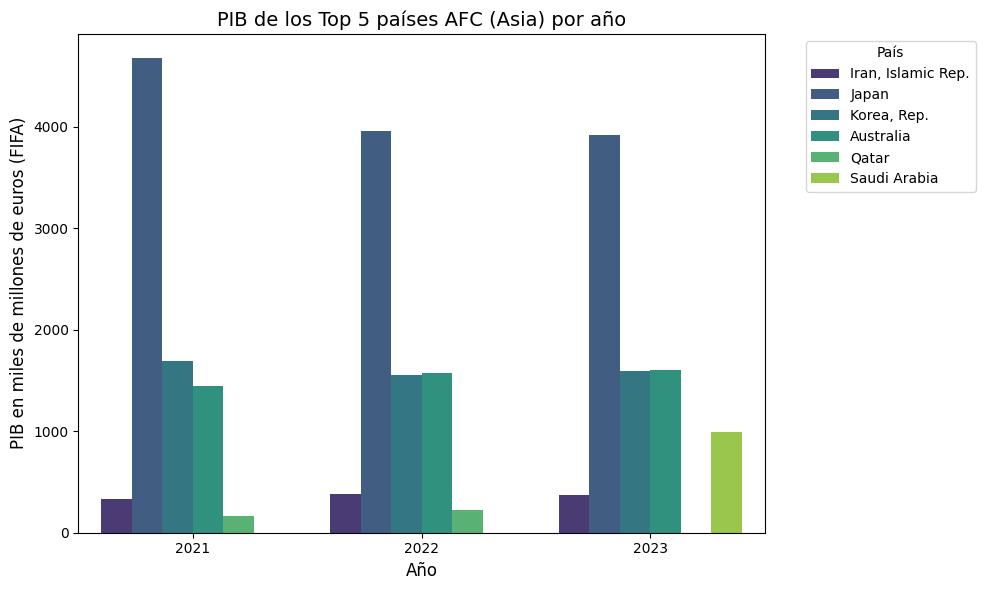

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(data=top5_afc, x='Year', y='PBI_EUR_billions_FIFA', hue='Country_ENG', palette='viridis')

plt.title('PIB de los Top 5 países AFC (Asia) por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('PIB en miles de millones de euros (FIFA)', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



In [6]:
# Filtrar confederación CAF (África)
caf_df = fifa_ultimos[fifa_ultimos['Confederation'] == 'CAF']

# Top 5 por año (según ranking FIFA)
top5_caf = caf_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)

# Columnas clave
top5_caf = top5_caf[['Year', 'Country_ENG', 'Position', 'PBI_EUR_billions_FIFA']]

# Mostrar tabla
display(top5_caf)


C:\Users\eduar\AppData\Local\Temp\ipykernel_26844\3688511034.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_caf = caf_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)


,Year,Country_ENG,Position,PBI_EUR_billions_FIFA
0,2021,Senegal,20,25.594329
1,2021,Morocco,28,131.890551
2,2021,Algeria,29,173.226839
3,2021,Tunisia,30,43.535430
4,2021,Nigeria,36,409.980263
5,2022,Senegal,18,25.686116
6,2022,Morocco,22,121.748680
7,2022,Tunisia,30,41.459178
8,2022,Nigeria,32,439.540875
9,2022,Algeria,37,209.771039


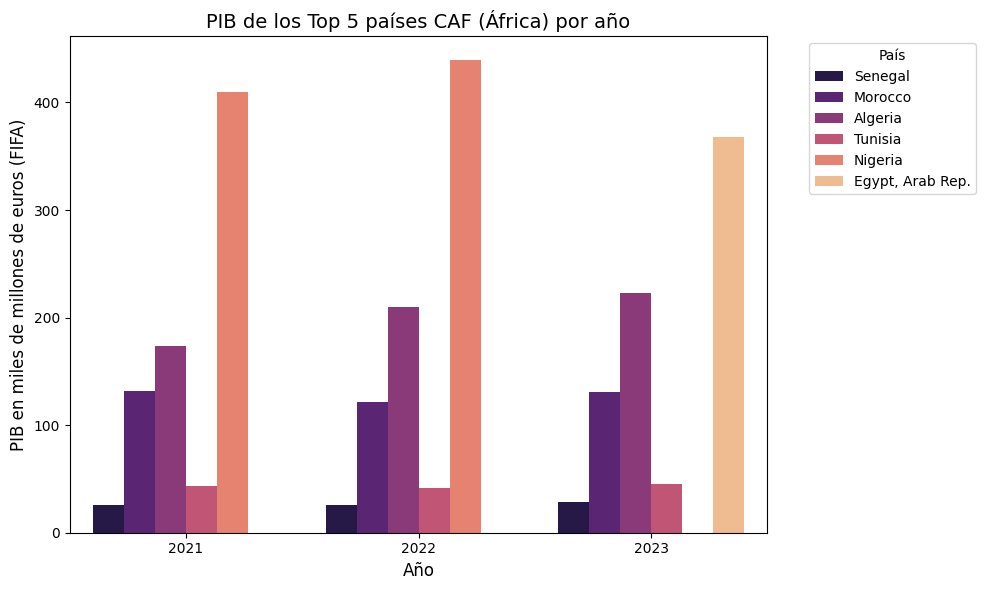

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top5_caf, x='Year', y='PBI_EUR_billions_FIFA', hue='Country_ENG', palette='magma')

plt.title('PIB de los Top 5 países CAF (África) por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('PIB en miles de millones de euros (FIFA)', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



In [11]:
# Filtrar confederación CONCACAF
concacaf_df = fifa_ultimos[fifa_ultimos['Confederation'] == 'CONCACAF']

# Top 5 por año (según Position)
top5_concacaf = concacaf_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)

# Columnas clave
top5_concacaf = top5_concacaf[['Year', 'Country_ENG', 'Position', 'PBI_EUR_billions_FIFA']]

# Mostrar tabla
display(top5_concacaf)


C:\Users\eduar\AppData\Local\Temp\ipykernel_26844\2783873617.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_concacaf = concacaf_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)


,Year,Country_ENG,Position,PBI_EUR_billions_FIFA
0,2021,United States,11,21942.448830
1,2021,Mexico,14,1221.154881
2,2021,Canada,40,1866.949129
3,2021,Costa Rica,49,60.413475
4,2021,Jamaica,57,13.631555
5,2022,Mexico,13,1360.891217
6,2022,United States,16,23942.020440
7,2022,Costa Rica,31,64.396572
8,2022,Canada,41,2010.179534
9,2022,Panama,60,71.165936


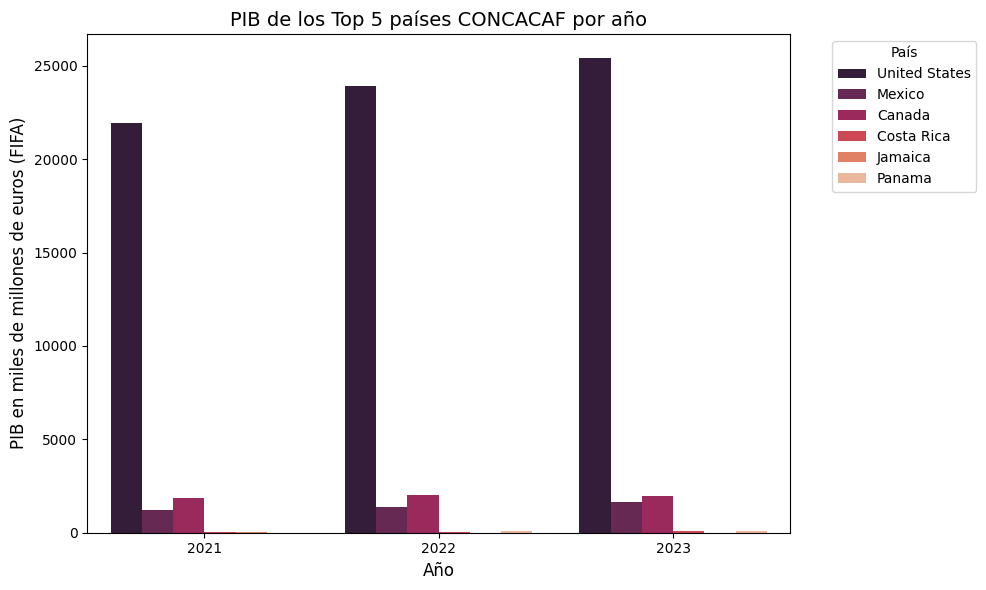

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=top5_concacaf,
    x='Year',
    y='PBI_EUR_billions_FIFA',
    hue='Country_ENG',
    palette='rocket'
)

plt.title('PIB de los Top 5 países CONCACAF por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('PIB en miles de millones de euros (FIFA)', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [13]:
# Filtrar confederación CONMEBOL (Sudamérica)
conmebol_df = fifa_ultimos[fifa_ultimos['Confederation'] == 'CONMEBOL']

# Top 5 por año según ranking FIFA
top5_conmebol = conmebol_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)

# Columnas clave
top5_conmebol = top5_conmebol[['Year', 'Country_ENG', 'Position', 'PBI_EUR_billions_FIFA']]

display(top5_conmebol)


C:\Users\eduar\AppData\Local\Temp\ipykernel_26844\3913581239.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_conmebol = conmebol_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)


,Year,Country_ENG,Position,PBI_EUR_billions_FIFA
0,2021,Brazil,2,1553.702081
1,2021,Argentina,5,453.749392
2,2021,Colombia,16,296.227909
3,2021,Uruguay,17,56.507543
4,2021,Peru,22,210.509479
5,2022,Brazil,1,1815.289266
6,2022,Argentina,3,586.954048
7,2022,Uruguay,14,65.253155
8,2022,Colombia,17,321.156784
9,2022,Peru,23,229.234545


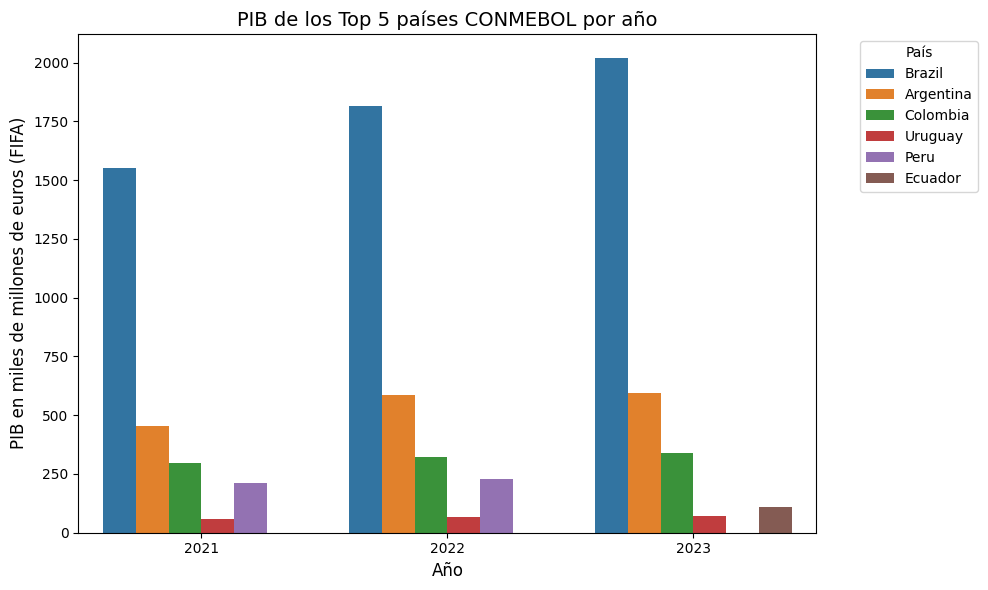

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top5_conmebol, x='Year', y='PBI_EUR_billions_FIFA', hue='Country_ENG')

plt.title('PIB de los Top 5 países CONMEBOL por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('PIB en miles de millones de euros (FIFA)', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [15]:
# Filtrar confederación OFC (Oceanía)
ofc_df = fifa_ultimos[fifa_ultimos['Confederation'] == 'OFC']

# Top 5 por año según ranking FIFA
top5_ofc = ofc_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)

# Columnas clave
top5_ofc = top5_ofc[['Year', 'Country_ENG', 'Position', 'PBI_EUR_billions_FIFA']]

display(top5_ofc)


C:\Users\eduar\AppData\Local\Temp\ipykernel_26844\2284599612.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_ofc = ofc_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)


,Year,Country_ENG,Position,PBI_EUR_billions_FIFA
0,2021,New Zealand,110,235.888994
1,2021,Solomon Islands,141,1.416199
2,2021,New Caledonia,153,9.366355
3,2021,Fiji,161,4.003679
4,2021,Vanuatu,163,0.883866
5,2022,New Zealand,105,229.462176
6,2022,Solomon Islands,136,1.456715
7,2022,Papua New Guinea,159,29.391366
8,2022,New Caledonia,161,8.949686
9,2022,Fiji,163,4.631381


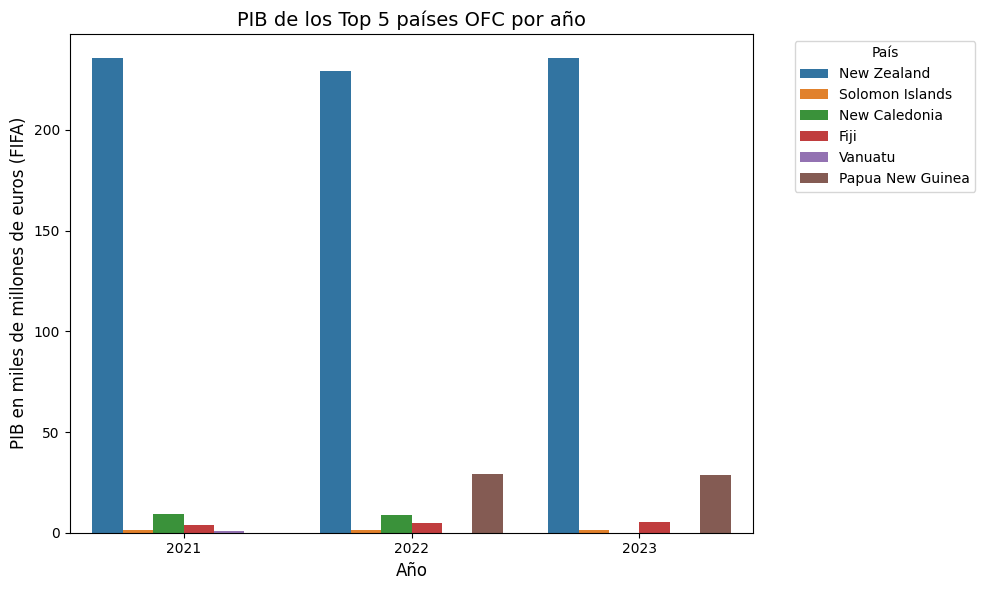

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=top5_ofc,
    x='Year',
    y='PBI_EUR_billions_FIFA',
    hue='Country_ENG'
)

plt.title('PIB de los Top 5 países OFC por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('PIB en miles de millones de euros (FIFA)', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [17]:
# Filtrar confederación UEFA (Europa)
uefa_df = fifa_ultimos[fifa_ultimos['Confederation'] == 'UEFA']

# Top 5 por año según ranking FIFA
top5_uefa = uefa_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)

# Columnas clave
top5_uefa = top5_uefa[['Year', 'Country_ENG', 'Position', 'PBI_EUR_billions_FIFA']]

display(top5_uefa)


C:\Users\eduar\AppData\Local\Temp\ipykernel_26844\4111279845.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_uefa = uefa_df.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)


,Year,Country_ENG,Position,PBI_EUR_billions_FIFA
0,2021,Belgium,1,558.841149
1,2021,France,3,2752.200912
2,2021,United Kingdom,4,2921.600726
3,2021,Italy,6,2004.034209
4,2021,Spain,7,1344.456038
5,2022,Belgium,2,542.761003
6,2022,France,4,2584.555780
7,2022,United Kingdom,5,2872.620980
8,2022,Italy,6,1922.284050
9,2022,Spain,7,1318.554434


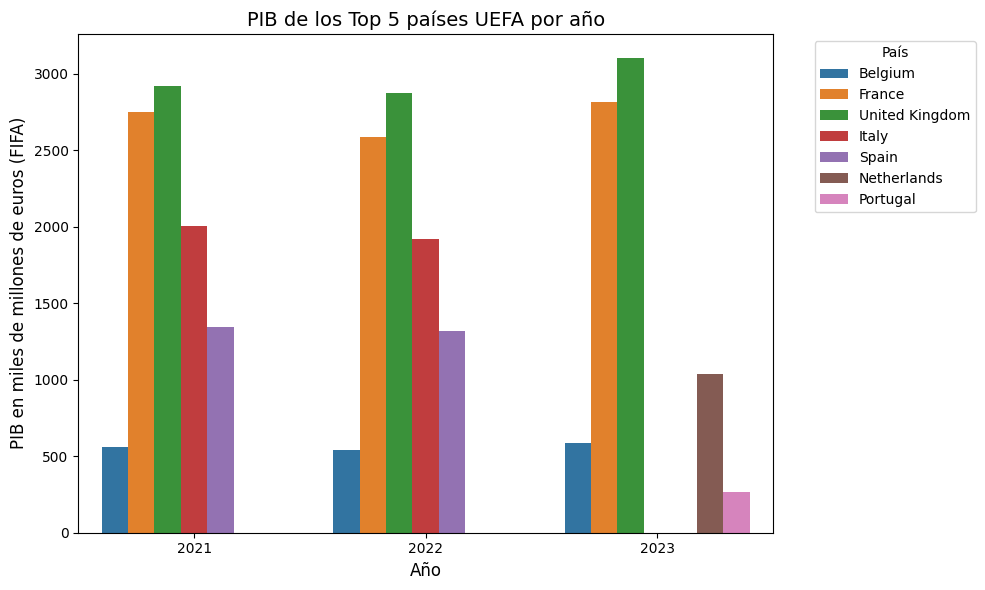

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=top5_uefa,
    x='Year',
    y='PBI_EUR_billions_FIFA',
    hue='Country_ENG'
)

plt.title('PIB de los Top 5 países UEFA por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('PIB en miles de millones de euros (FIFA)', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# Lista de confederaciones según tus datos
confeds = fifa_ultimos['Confederation'].unique()

resumen = []

for conf in confeds:
    df_conf = fifa_ultimos[fifa_ultimos['Confederation'] == conf]

    # Top 5 por año
    top5 = df_conf.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)

    # Cálculos principales
    avg_pib = top5['PBI_EUR_billions_FIFA'].mean()
    avg_pos = top5['Position'].mean()
    max_pib = top5['PBI_EUR_billions_FIFA'].max()
    min_pib = top5['PBI_EUR_billions_FIFA'].min()

    resumen.append([conf, avg_pib, avg_pos, max_pib, min_pib])

# Convertir a DataFrame
tabla_resumen = pd.DataFrame(resumen, columns=[
    'Confederation', 'Avg_PIB_Top5', 'Avg_Position_Top5', 'Max_PIB_Top5', 'Min_PIB_Top5'
])

# Mostrar tabla final
display(tabla_resumen)


C:\Users\eduar\AppData\Local\Temp\ipykernel_26844\3653550160.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5 = df_conf.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=True)
C:\Users\eduar\AppData\Local\Temp\ipykernel_26844\3653550160.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5 = df_conf.groupby('Year').apply(lambda x: x.nsmallest(5, 'Position')).reset_index(drop=Tr

,Confederation,Avg_PIB_Top5,Avg_Position_Top5,Max_PIB_Top5,Min_PIB_Top5
0,UEFA,1776.112136,4.466667,3106.230114,266.984413
1,CONMEBOL,581.753019,12.200000,2021.509060,56.507543
2,CONCACAF,5454.056944,33.333333,25445.669550,13.631555
3,CAF,161.263888,27.066667,439.540875,25.594329
4,AFC,1633.205062,31.000000,4682.197330,167.150769
5,OFC,54.999193,145.333333,235.888994,0.883866


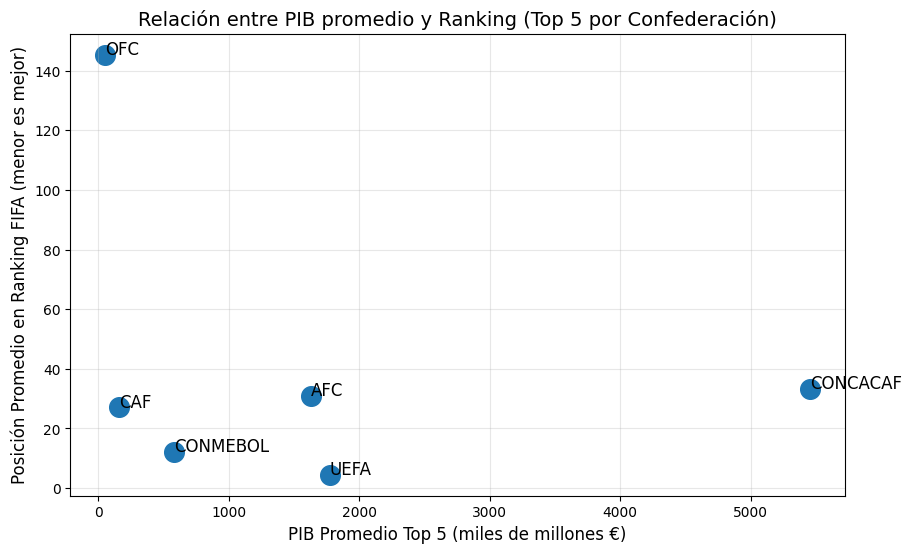

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(
    tabla_resumen['Avg_PIB_Top5'],
    tabla_resumen['Avg_Position_Top5'],
    s=200
)

# Etiquetas de los puntos
for i, row in tabla_resumen.iterrows():
    plt.text(row['Avg_PIB_Top5'], row['Avg_Position_Top5'], row['Confederation'], fontsize=12)

plt.title('Relación entre PIB promedio y Ranking (Top 5 por Confederación)', fontsize=14)
plt.xlabel('PIB Promedio Top 5 (miles de millones €)', fontsize=12)
plt.ylabel('Posición Promedio en Ranking FIFA (menor es mejor)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()


- *Visualizations*

- *Relationship between variables*